In [0]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [0]:
def Calc_chi_and_S(network):
    _network_N = network.number_of_nodes();
    _comps = nx.connected_components(network);
    _comp_sizes = [len(_comp) for _comp in _comps];
    _sort_c_sizes = sorted(_comp_sizes,reverse=True);
    _lcs = _sort_c_sizes[0]/_network_N;
    _chi = 0;
    if len(_sort_c_sizes) > 1:
        _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))]);
        return _chi/(len(_sort_c_sizes)),_lcs;
    else:
        return _chi,_lcs;

In [0]:
N, num_samp = 1500, 10;
delta = 500;
p_crit = 1/(N-1);
maxChi = 0;
est_N_crit = 0;
size_list = np.linspace(N-delta, N+delta, num = 100, endpoint = False, dtype = 'int')
av_S,av_chi = [],[];
av_S.clear();
av_chi.clear();
for size in size_list:
    S_values, chi_values = [],[];
    S_values.clear();
    chi_values.clear();
    for i in range(0,num_samp):
        ER_graph = nx.generators.erdos_renyi_graph(size,p_crit);
        chi,S = Calc_chi_and_S(ER_graph);
        S_values.append(S);
        chi_values.append(chi);
    av_S.append(np.mean(S_values));
    meanChi = np.mean(chi_values)
    if (meanChi > maxChi):
        maxChi = meanChi;
        est_N_crit = size;
    av_chi.append(meanChi);

<Figure size 432x288 with 0 Axes>

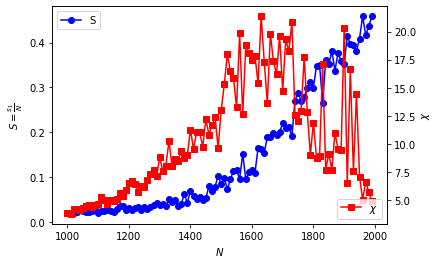

In [18]:
plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [0]:
from google.colab import files
import json

data = {}
data['N'] = N;
data['est_N_crit'] = int(est_N_crit);
data['maxChi'] = maxChi;
data['size_list'] = size_list.tolist();
data['av_S'] = av_S;
data['av_chi'] = av_chi;

with open('s_chi_e-r_1500_scale_n.json', 'w') as json_file:
  json.dump(data, json_file)

files.download('s_chi_e-r_1500_scale_n.json')

In [23]:
print(est_N_crit)
loc_N_crit = np.where(size_list == est_N_crit)[0][0] #find location of the estimated p_c in the list of p_list
print(loc_N_crit)

#setting the interval for the neighborhood around p_c, 40 points around the estimated p_c
begInt = loc_N_crit - 25
endInt = loc_N_crit + 25

1630
63


<Figure size 432x288 with 0 Axes>

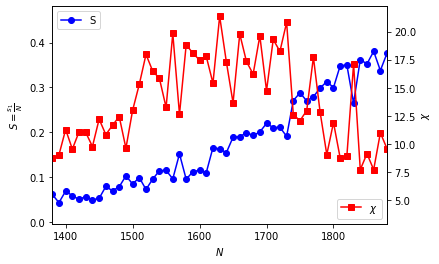

In [27]:
#testing the interval
plt.clf();
fig,ax = plt.subplots()
ax.plot(size_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(size_list,av_chi,'s-',label = r'$\chi$',color = 'red')
ax2.set_ylabel(r'$\chi$')
ax.set_xlabel(r'$N$')
plt.xlim((size_list[begInt], size_list[endInt]))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
plt.show();

In [0]:
#setting the interval
size_nei = size_list[begInt:endInt+1]
s_nei = av_S[begInt:endInt+1]

In [0]:
def getRMSE(fitted, x, y):
    return np.mean((y- fitted(x)) ** 2)

In [0]:
est_S = {} #storing the estimated values by each model
err_model = [] #storing the error for each model
degRange = range(2,6)
size_iter = np.linspace(size_nei[0], size_nei[len(size_nei)-1], 1000)
for deg in degRange:
  #fitting the linear model
  model = np.poly1d(np.polyfit(size_nei, s_nei, deg))

  #getting the estimated results
  est_S[deg] = model(size_iter)

  #getting the RMSE for each model
  err_model.append(getRMSE(model, size_nei, s_nei))

<Figure size 432x288 with 0 Axes>

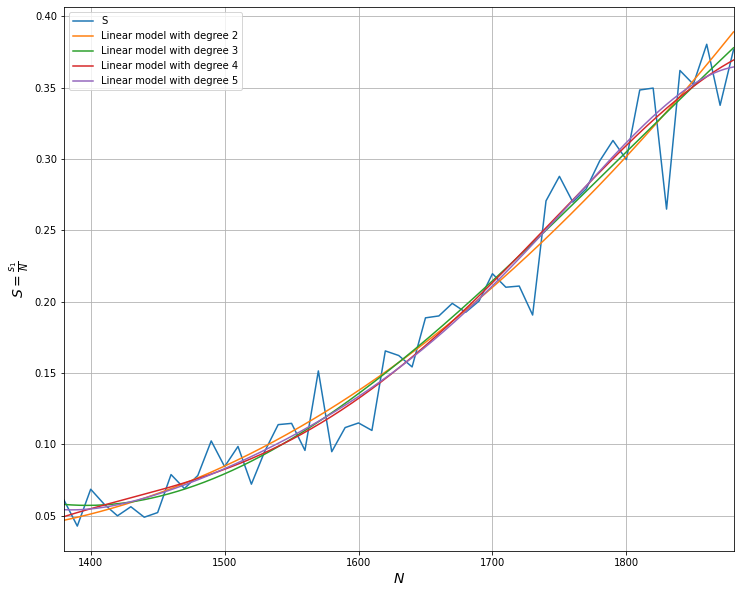

In [30]:
mult = 1.0
plt.clf()
plt.figure(figsize = (12, 10))
plt.xlabel(xlabel = r'$N$', fontsize = 14)
plt.ylabel(ylabel = r'$S=\frac{s_1}{N}$', fontsize = 14)
plt.plot(size_nei,s_nei,'-',label = 'S')
plt.xlim((size_nei[0], size_nei[len(size_nei)-1]))
for deg in degRange:
    plt.plot(size_iter, est_S[deg], label = "Linear model with degree " + str(deg))
plt.legend(loc = 0)
plt.grid()
plt.show()

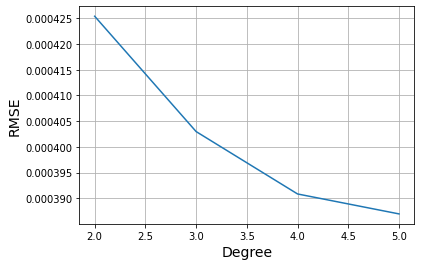

In [31]:
mult = 1.0
plt.clf()
plt.xlabel(xlabel = r'Degree', fontsize = 14)
plt.ylabel(ylabel = r'RMSE', fontsize = 14)
plt.plot(list(degRange), err_model)
plt.grid()
plt.show()

In [0]:
from scipy.optimize import curve_fit
#Source: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

In [0]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [0]:
pars, cov = curve_fit(f=power_law, xdata=size_nei, ydata=s_nei, p0=[0, 0], bounds=(-np.inf, np.inf), maxfev = 1000)
pow_model_est = power_law(size_iter, *pars)

<Figure size 432x288 with 0 Axes>

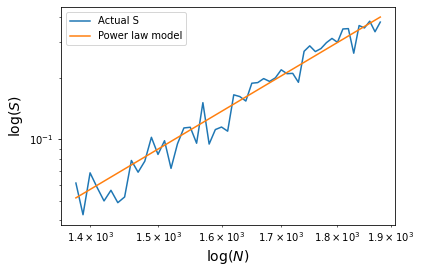

In [36]:
plt.clf()
fig,ax = plt.subplots()

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(xlabel = r'$\log(N)$', fontsize = 14)
plt.ylabel(ylabel = r'$\log(S)$', fontsize = 14)

# Set the axis limits
plt.plot(size_nei, s_nei, label = 'Actual S')
plt.plot(size_iter, pow_model_est, label = 'Power law model')
plt.legend(loc = 0)
plt.show()

In [37]:
np.mean((s_nei- power_law(size_nei, *pars)) ** 2)

0.0004714784587754333